In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/fire_dataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(32, 32),
  batch_size=10)

test_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/fire_dataset",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(32, 32),
  batch_size=10)


Found 993 files belonging to 2 classes.
Using 795 files for training.
Found 993 files belonging to 2 classes.
Using 198 files for validation.


In [ ]:
class_names = ['fire', 'not_fire']

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 128)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=14, validation_data=test_ds)

Epoch 1/14
80/80 [==============================] - 18s 188ms/step - loss: 1.3178 - accuracy: 0.8428 - val_loss: 0.1796 - val_accuracy: 0.9394
Epoch 2/14
80/80 [==============================] - 17s 193ms/step - loss: 0.1779 - accuracy: 0.9333 - val_loss: 0.1492 - val_accuracy: 0.9444
Epoch 3/14
80/80 [==============================] - 16s 180ms/step - loss: 0.2652 - accuracy: 0.8868 - val_loss: 0.1129 - val_accuracy: 0.9495
Epoch 4/14
80/80 [==============================] - 16s 184ms/step - loss: 0.1541 - accuracy: 0.9321 - val_loss: 0.2292 - val_accuracy: 0.9343
Epoch 5/14
80/80 [==============================] - 17s 194ms/step - loss: 0.0912 - accuracy: 0.9660 - val_loss: 0.1147 - val_accuracy: 0.9646
Epoch 6/14
80/80 [==============================] - 16s 185ms/step - loss: 0.0922 - accuracy: 0.9698 - val_loss: 0.1381 - val_accuracy: 0.9444
Epoch 7/14
80/80 [==============================] - 16s 185ms/step - loss: 0.0682 - accuracy: 0.9660 - val_loss: 0.1435 - val_accuracy: 0.9495

In [ ]:

import numpy as np

def confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, num_classes=None) -> np.ndarray:
    """"
    Computes the confusion matrix from labels (y_true) and predictions (y_pred).
    The matrix columns represent the prediction labels and the rows represent the ground truth labels.
    The confusion matrix is always a 2-D array of shape `[num_classes, num_classes]`,
    where `num_classes` is the number of valid labels for a given classification task.
    The arguments y_true and y_pred must have the same shapes in order for this function to work
    num_classes represents the number of classes for the classification problem. If this is not provided,
    it will be computed from both y_true and y_pred
    """
    # even here try to use vectorization, so NO for loops

    # 0. if the number of classes is not provided, compute it based on the y_true and y_pred arrays

    # 1. create a confusion matrix of shape (num_classes, num_classes) and initialize it to 0

    # 2. use argmax to get the maximal prediction for each sample
    # hint: you might find np.add.at useful: https://numpy.org/doc/stable/reference/generated/numpy.ufunc.at.html

    if num_classes is None:
        num_classes = len(np.unique(np.concatenate([y_true, y_pred])))
    conf_mat = np.zeros((num_classes, num_classes))
    np.add.at(conf_mat, (y_true, y_pred), 1)
    return conf_mat


def precision_score(y_true: np.ndarray, y_pred: np.ndarray, num_classes=None) -> float:
    """"
    Computes the precision score.
    For binary classification, the precision score is defined as the ratio tp / (tp + fp)
    where tp is the number of true positives and fp the number of false positives.
    For multiclass classification, the precision and recall scores are obtained by summing over the rows / columns
    of the confusion matrix.
    num_classes represents the number of classes for the classification problem. If this is not provided,
    it will be computed from both y_true and y_pred
    """
    if num_classes is None:
        num_classes = len(np.unique(np.concatenate([y_true, y_pred])))
    conf = confusion_matrix(y_true, y_pred, num_classes)
    tp = np.diag(conf)
    tp_plus_fp = np.sum(conf, axis=0)
    precision = np.divide(tp, tp_plus_fp, where=tp_plus_fp != 0)
    return precision


def recall_score(y_true: np.ndarray, y_pred: np.ndarray, num_classes=None) -> float:
    """"
    Computes the recall score.
    For binary classification, the recall score is defined as the ratio tp / (tp + fn)
    where tp is the number of true positives and fn the number of false negatives
    For multiclass classification, the precision and recall scores are obtained by summing over the rows / columns
    of the confusion matrix.
    num_classes represents the number of classes for the classification problem. If this is not provided,
    it will be computed from both y_true and y_pred
    """
    if num_classes is None:
        num_classes = len(np.unique(np.concatenate([y_true, y_pred])))
    conf = confusion_matrix(y_true, y_pred, num_classes)
    tp = np.diag(conf)
    tp_plus_fn = np.sum(conf, axis=1)
    precision = np.divide(tp, tp_plus_fn, where=tp_plus_fn != 0)
    return precision


def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    # remember, use vectorization, so no for loops
    # hint: you might find np.trace useful here https://numpy.org/doc/stable/reference/generated/numpy.trace.html
    return np.trace(confusion_matrix(y_true, y_pred)) / len(y_true)


def f1_score(y_true: np.ndarray, y_pred: np.ndarray, num_classes=None) -> float:
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    if num_classes is None:
        num_classes = len(np.unique(np.concatenate([y_true, y_pred])))
    multiply = 2 * precision * recall
    pr_sum = precision + recall
    return np.divide(multiply, pr_sum, where=pr_sum != 0)


def print_stats(y_true, y_pred):
    print("Confusion")
    print(confusion_matrix(y_true, y_pred))
    print("Precision")
    print(precision_score(y_true, y_pred))
    print("Recall")
    print(recall_score(y_true, y_pred))
    print("Accuracy")
    print(accuracy_score(y_true, y_pred))
    print("F1 score")
    print(f1_score(y_true, y_pred))

In [ ]:
B_x = []
B_y = []
preds = []
for batch_x, batch_y in test_ds:
    B_x.extend(batch_x)
    B_y.extend(batch_y)
B_x = np.asarray(B_x)
B_y = np.asarray(B_y)
predictions = model.predict(B_x)
predictions = tf.argmax(predictions, axis=-1).numpy()
print_stats(B_y, predictions)

Confusion
[[146.   4.]
 [  2.  46.]]
Precision
[0.98648649 0.92      ]
Recall
[0.97333333 0.95833333]
Accuracy
0.9696969696969697
F1 score
[0.97986577 0.93877551]


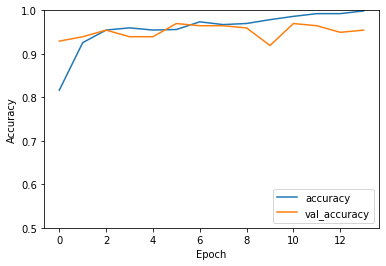

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')